In [1]:
# 1. Các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

# 2. Tải file dữ liệu
df = pd.read_excel('/kaggle/input/eth-data/processed_data.xlsx')
df = df.reset_index(drop=True) # Reset the index

In [2]:
# Chia train test validate theo tỉ lệ 7:2:1
train_size = int(0.6 * len(df))
test_size = int(0.2 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

In [3]:
# 3. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1) #x_train chứa các chỉ số, là biến độc lập
y_train = np.array(train_data['Close']) #y_train chứa gtr Close, là biến phụ thuộc

# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [4]:
# 4. Quá trình testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Close'])
y_pred = model.predict(x_test)

# 5. Quá trình Validate
x_val = np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Close'])
y_pred_val = model.predict(x_val)

In [5]:
# 6. Quá trình tạo index predict 100 ngày tiếp theo
last_index =  df.index[-1] #lấy chỉ số dòng cuối cùng trong dataframe
last_data = pd.RangeIndex(start=last_index, stop=last_index+100, step=1)

# Tạo một mảng numpy chứa 100 số nguyên liên tiếp bắt đầu từ last_index + 1
x_next_100_days = np.array(range(last_index+1, last_index+101)).reshape(-1, 1)

# Dự đoán giá đóng cửa (Close) cho 100 ngày tiếp theo
y_next_100_days = model.predict(x_next_100_days)

# In ra giá đóng cửa dự đoán cho 100 ngày tiếp theo
print('Predicted closing prices for the next 100 days:')
print(y_next_100_days)

Predicted closing prices for the next 100 days:
[6232.46593862 6236.1171423  6239.76834599 6243.41954967 6247.07075335
 6250.72195704 6254.37316072 6258.02436441 6261.67556809 6265.32677178
 6268.97797546 6272.62917914 6276.28038283 6279.93158651 6283.5827902
 6287.23399388 6290.88519756 6294.53640125 6298.18760493 6301.83880862
 6305.4900123  6309.14121598 6312.79241967 6316.44362335 6320.09482704
 6323.74603072 6327.3972344  6331.04843809 6334.69964177 6338.35084546
 6342.00204914 6345.65325282 6349.30445651 6352.95566019 6356.60686388
 6360.25806756 6363.90927125 6367.56047493 6371.21167861 6374.8628823
 6378.51408598 6382.16528967 6385.81649335 6389.46769703 6393.11890072
 6396.7701044  6400.42130809 6404.07251177 6407.72371545 6411.37491914
 6415.02612282 6418.67732651 6422.32853019 6425.97973387 6429.63093756
 6433.28214124 6436.93334493 6440.58454861 6444.2357523  6447.88695598
 6451.53815966 6455.18936335 6458.84056703 6462.49177072 6466.1429744
 6469.79417808 6473.44538177 647

In [6]:
# 7. Tính RMSE: Đánh giá độ chính xác validate, test
from sklearn.metrics import mean_squared_error, mean_absolute_error

valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))

# Calculate MSE
valid_mse = mean_squared_error(y_val, y_pred_val)
test_mse = mean_squared_error(y_test, y_pred)

# Tính MAE cho validate và test
valid_mae = np.mean(np.abs(y_pred_val - y_val))
test_mae = np.mean(np.abs(y_pred - y_test))

# Tính MAPE cho validate và test
valid_mape = np.mean(np.abs((y_pred_val - y_val) / y_val)) * 100
test_mape = np.mean(np.abs((y_pred - y_test) / y_test)) * 100

# In kết quả
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)
print('Validation MSE:', valid_mse)
print('Testing MSE:', test_mse)
print('Validation MAE:', valid_mae)
print('Testing MAE:', test_mae)
print('Validation MAPE:', valid_mape)
print('Testing MAPE:', test_mape)

Validation RMSE: 3221.507273805254
Testing RMSE: 2599.149426225043
Validation MSE: 10378109.11518016
Testing MSE: 6755577.739845971
Validation MAE: 3195.0950524219506
Testing MAE: 2537.4318498545695
Validation MAPE: 151.74021136712375
Testing MAPE: 171.53404036568375


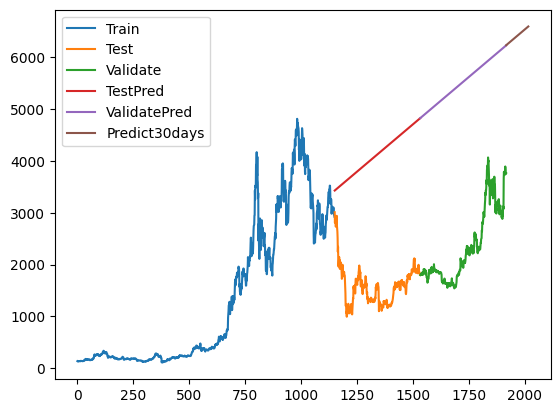

In [7]:
# 8.Vẽ hình
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(val_data.index, val_data['Close'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index, y_pred_val)
plt.plot(last_data,y_next_100_days)
plt.legend(['Train','Test','Validate','TestPred','ValidatePred','Predict30days'])
plt.show()